**Gerekli Kütüphaneleri Yükleme Adımı**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')

**Verileri Okuma, Ayırma, Normalleştirme ve Train Test Bölme İşlemleri**

In [17]:
# veri = pd.read_csv("veri-seti.txt", sep="\t", header=None)
veri=pd.read_csv("https://raw.githubusercontent.com/ylcnsonur/uu-ml-final/main/veri-seti.txt", sep="\t", header=None)


X = veri[[0,1,2,3,4,5,6,7]]
y = veri[[8]]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized,y, test_size=0.3, random_state=57)

**Yardımcı Fonkisyon**

In [6]:
def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' - ROC Curve')
    plt.legend()
    plt.show()


**####################### Gaussian Naive Bayes (SORU 2) #######################**

** Test Seti Doğruluk Oranı **
: 0.7792207792207793
** Train Seti Doğruluk Oranı **
: 0.74487895716946
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       155
           1       0.66      0.67      0.67        76

    accuracy                           0.78       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231

Mean Square Error: 0.22077922077922077


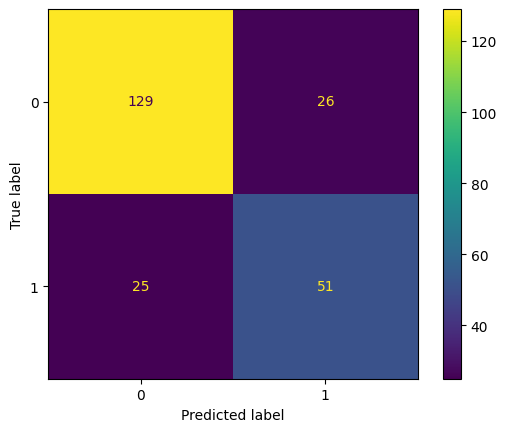

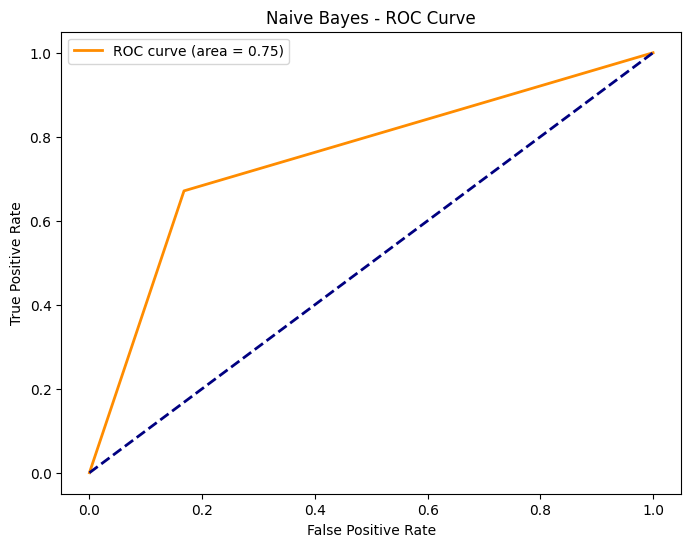

In [7]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
y_pred_train = nb_model.predict(X_train)
print("** Test Seti Doğruluk Oranı **\n:",accuracy_score(y_test, y_pred))
print("** Train Seti Doğruluk Oranı **\n:",accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))


labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();


# MSE Hesaplaması
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
print('Mean Square Error:', meanSqErr)

plot_roc_curve(y_test, y_pred, "Naive Bayes")

**################# K-nearest neighbors (SORU 3) #################**

** Test Seti Doğruluk Oranı **
: 0.7142857142857143
** Train Seti Doğruluk Oranı **
: 1.0
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       155
           1       0.56      0.58      0.57        76

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.72      0.71      0.72       231

Mean Square Error: 0.2857142857142857


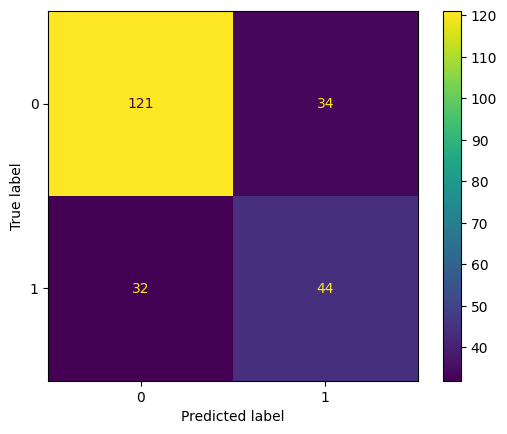

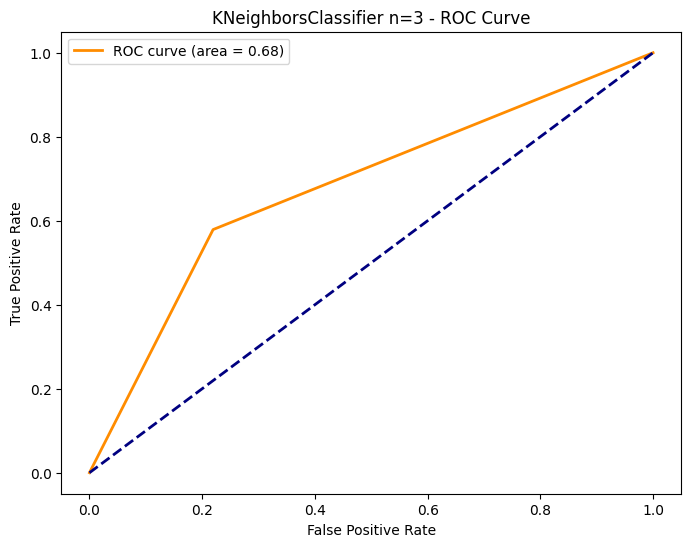

In [8]:
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', leaf_size = 39, p = 150)
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)
print("** Test Seti Doğruluk Oranı **\n:",accuracy_score(y_test, y_pred))
print("** Train Seti Doğruluk Oranı **\n:",accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# MSE Hesaplaması
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
print('Mean Square Error:', meanSqErr)

plot_roc_curve(y_test, y_pred, "KNeighborsClassifier n=3")

**##### KNN with optimization**

In [9]:
knn_params = {'n_neighbors': list(range(3, 20, 2)),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_model.fit(X_train, y_train)

knn_predict = knn_model.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_predict)
print("Best Score:"+str(knn_model.best_score_))
print("Best Parameters:"+str(knn_model.best_params_))


Best Score:0.7466078227760471
Best Parameters:{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}


**######################## Support Vector Classification (SORU 4) ########################**

** Test Seti Doğruluk Oranı **
: 0.7792207792207793
** Train Seti Doğruluk Oranı **
: 0.8175046554934823
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       155
           1       0.68      0.62      0.65        76

    accuracy                           0.78       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.78      0.78       231

Mean Square Error: 0.22077922077922077


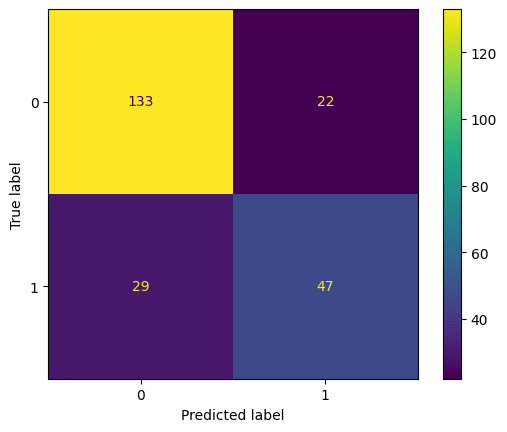

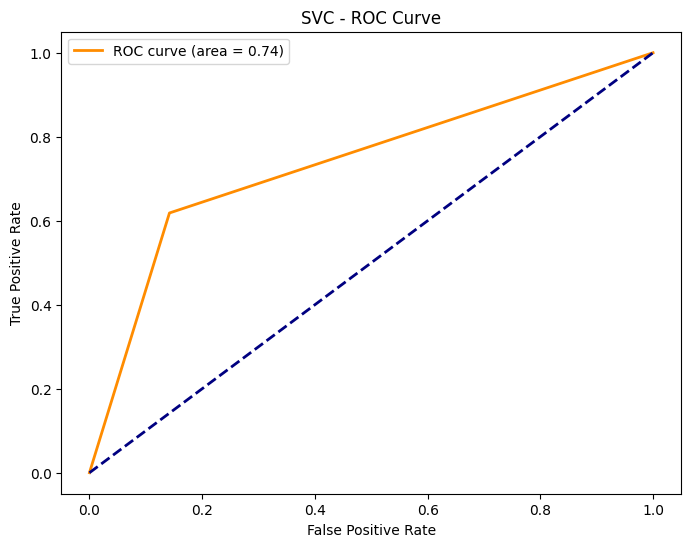

In [10]:
svm_model = SVC(random_state = 57).fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)
print("** Test Seti Doğruluk Oranı **\n:",accuracy_score(y_test, y_pred))
print("** Train Seti Doğruluk Oranı **\n:",accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))


labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();


# MSE Hesaplaması
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
print('Mean Square Error:', meanSqErr)


plot_roc_curve(y_test, y_pred, "SVC")

**##### SVM with optimization**

In [11]:
svm_hip = {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }

grid_search = GridSearchCV(SVC(random_state = 57), svm_hip, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Score:"+str(grid_search.best_score_))
print("Best Parameters:"+str(grid_search.best_params_))

Best Score:0.7597265489788854
Best Parameters:{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


**########################### Yapay Sinir Ağları - MLP (SORU 4) ###########################**

** Test Seti Doğruluk Oranı **
: 0.7922077922077922
** Train Seti Doğruluk Oranı **
: 0.8230912476722533
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       155
           1       0.69      0.67      0.68        76

    accuracy                           0.79       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.79      0.79      0.79       231

** Grafik : CM **
:
Mean Square Error: 0.2077922077922078


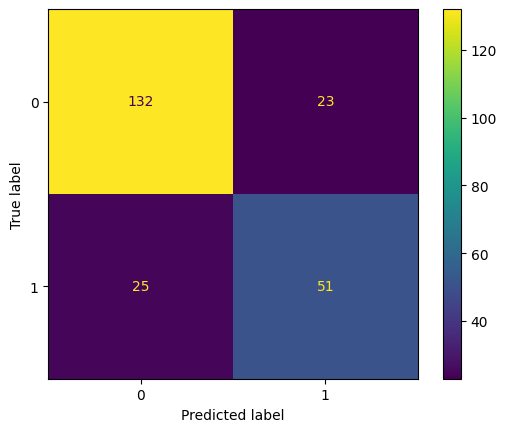

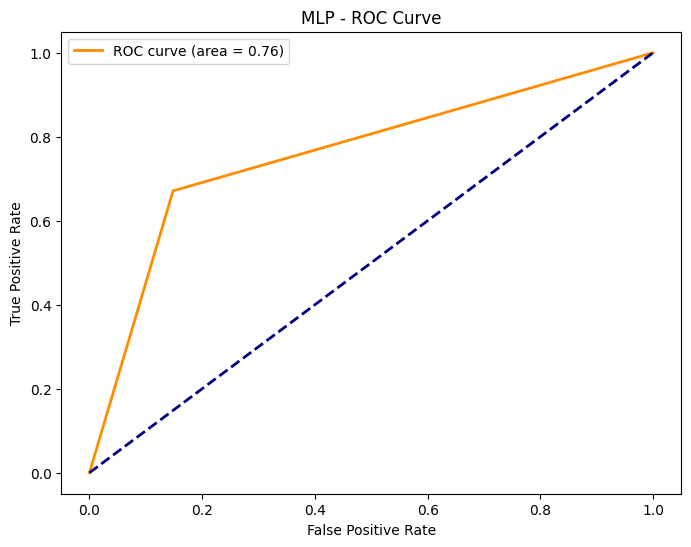

In [12]:
mlpc_model = MLPClassifier(random_state = 57).fit(X_train, y_train)
y_pred = mlpc_model.predict(X_test)
y_pred_train = mlpc_model.predict(X_train)
print("** Test Seti Doğruluk Oranı **\n:",accuracy_score(y_test, y_pred))
print("** Train Seti Doğruluk Oranı **\n:",accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

print("** Grafik : CM **\n:")
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# MSE Hesaplaması
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
print('Mean Square Error:', meanSqErr)

plot_roc_curve(y_test, y_pred, "MLP")

**##### MLP with optimization**

In [13]:
mlp_gs = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Best Score:"+str(clf.best_score_))
print("Best Parameters:"+str(clf.best_params_))

Best Score:0.76711664935964
Best Parameters:{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
